In [1]:
def udf_mean(x):
    return sum(x) / len(x)

In [2]:
udf_mean([1, 3, 5, 7, 9])

5.0

In [4]:
import pandas as pd
df = pd.read_csv("bike.csv")
df.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [5]:
df_sub = df.sample(n = 3)
df_sub

datetime  season  holiday  workingday  weather   temp  \
8725   2012-08-05 22:00:00       3        0           0        1  29.52   
10770  2012-12-15 04:00:00       4        0           0        2   9.84   
7788   2012-06-04 21:00:00       2        0           1        1  23.78   

        atemp  humidity  windspeed  casual  registered  count  
8725   34.850        79     6.0032      57         100    157  
10770  12.880        87     7.0015       1           5      6  
7788   27.275        49    16.9979      40         225    265

In [6]:
df_sub.reset_index()

index             datetime  season  holiday  workingday  weather   temp  \
0   8725  2012-08-05 22:00:00       3        0           0        1  29.52   
1  10770  2012-12-15 04:00:00       4        0           0        2   9.84   
2   7788  2012-06-04 21:00:00       2        0           1        1  23.78   

    atemp  humidity  windspeed  casual  registered  count  
0  34.850        79     6.0032      57         100    157  
1  12.880        87     7.0015       1           5      6  
2  27.275        49    16.9979      40         225    265

In [8]:
df_sub.reset_index(drop = True)

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2012-08-05 22:00:00       3        0           0        1  29.52  34.850   
1  2012-12-15 04:00:00       4        0           0        2   9.84  12.880   
2  2012-06-04 21:00:00       2        0           1        1  23.78  27.275   

   humidity  windspeed  casual  registered  count  
0        79     6.0032      57         100    157  
1        87     7.0015       1           5      6  
2        49    16.9979      40         225    265

In [9]:
import numpy as np
season = df["season"]

In [10]:
season # Series 객체임.

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: int64

In [13]:
set(season)

{1, 2, 3, 4}

In [14]:
np.unique(season) # numpy의 unique() 함수

array([1, 2, 3, 4], dtype=int64)

In [15]:
season.unique() # series 객체의 unique() 메서드

array([1, 2, 3, 4], dtype=int64)

In [16]:
len(season.unique()) # len() 함수는 length 의 첫 세글자를 딴 것. 원소 개수(객체 길이)

4

In [17]:
season.nunique() # number of unique elements

4

In [18]:
season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [19]:
season.value_counts(normalize = True)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

In [21]:
season.value_counts().reset_index().to_csv("season_cnt.csv", index = False)

index  season
0      4    2734
1      2    2733
2      3    2733
3      1    2686

In [24]:
df.iloc[0, :2] # Series

datetime    2011-01-01 00:00:00
season                        1
Name: 0, dtype: object

In [23]:
df.iloc[[0], :2] # DataFrame

datetime  season
0  2011-01-01 00:00:00       1

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 978.1+ KB


In [26]:
df["datetime"].dtype # 'O'는 Object의 'O'이다. (문자가 포함되어있을 수 있음)

dtype('O')

In [27]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [28]:
df["season"].astype("str").dtype

dtype('O')

In [29]:
df = pd.read_csv("krx_202105_utf8.csv")
df.head(2)

지수명        종가     대비   등락률        시가        고가        저가        거래량  \
0  KRX 300   1901.05 -11.63 -0.61   1913.15   1929.94   1896.65  279548840   
1  KTOP 30  11520.28 -86.30 -0.74  11609.44  11702.14  11490.84   50048566   

             거래대금            상장시가총액        날짜  
0  13488481375036  2028800954161500  20210503  
1   5645660149606  1208343758559140  20210503

In [30]:
df["지수명"].unique()

array(['KRX 300', 'KTOP 30', 'KRX 100', 'KRX Mid 200', 'KRX 자동차',
       'KRX 반도체', 'KRX 헬스케어', 'KRX 은행', 'KRX 에너지화학', 'KRX 철강', 'KRX 방송통신',
       'KRX 건설', 'KRX 증권', 'KRX 기계장비', 'KRX 보험', 'KRX 운송', 'KRX 경기소비재',
       'KRX 필수소비재', 'KRX 미디어&엔터테인먼트', 'KRX 정보기술', 'KRX 유틸리티',
       'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재', 'KRX 300 산업재',
       'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'],
      dtype=object)

In [32]:
df_sub = df.loc[df["지수명"] == "KRX 300", ]
df_sub

지수명       종가     대비   등락률       시가       고가       저가        거래량  \
0    KRX 300  1901.05 -11.63 -0.61  1913.15  1929.94  1896.65  279548840   
29   KRX 300  1916.40  15.35  0.81  1903.57  1916.40  1892.36  244040965   
58   KRX 300  1927.40  11.00  0.57  1916.50  1927.40  1904.76  341534594   
87   KRX 300  1936.40   9.00  0.47  1926.59  1942.80  1925.24  253210064   
116  KRX 300  1968.47  32.07  1.66  1938.63  1973.17  1938.63  294421965   
145  KRX 300  1936.37 -32.10 -1.63  1962.35  1962.35  1929.74  339313903   
174  KRX 300  1903.99 -32.38 -1.67  1936.18  1936.82  1891.55  352799341   
203  KRX 300  1878.46 -25.53 -1.34  1893.72  1899.65  1869.37  402046342   
232  KRX 300  1899.13  20.67  1.10  1884.85  1905.26  1884.85  229722051   
261  KRX 300  1891.72  -7.41 -0.39  1906.35  1912.03  1882.03  258826078   
290  KRX 300  1913.67  21.95  1.16  1892.13  1917.43  1892.13  248484463   
319  KRX 300  1906.26  -7.41 -0.39  1914.61  1914.61  1894.97  224240546   
348  KRX 300  1907.38   1.12  0.06  1912.44  1932.91  1902.03  247944350   
377  KRX 300  1897.69  -9.69 -0.51  1906.60  1910.68  1893.57  210439901   
406  KRX 300  1915.26  17.57  0.93  1903.17  1916.85  1900.82  208362193   
435  KRX 300  1911.68  -3.58 -0.19  1915.76  1922.77  1907.37  257307289   
464  KRX 300  1910.09  -1.59 -0.08  1913.55  1915.55  1894.84  327607567   
493  KRX 300  1922.87  12.78  0.67  1913.77  1929.84  1912.48  234219802   
522  KRX 300  1932.64   9.77  0.51  1924.63  1933.75  1916.75  278319769   

               거래대금            상장시가총액        날짜  
0    13488481375036  2028800954161500  20210503  
29   11708937073166  2043945386926060  20210504  
58   13004811637843  2059578026871265  20210506  
87   11101387594368  2070880919861705  20210507  
116  13784089230905  2105851479694870  20210510  
145  15976844135869  2075382637364310  20210511  
174  17136393156387  2043316163563660  20210512  
203  16819555547844  2014899605250130  20210513  
232  11413338490975  2038805937109210  20210514  
261  11333749894174  2027913472817160  20210517  
290  11503457331908  2053066878361790  20210518  
319  10906767355146  2047273506168110  20210520  
348  12200080796814  2042477090377600  20210521  
377   9568918143070  2035955475360540  20210524  
406   9591985036024  2054548999380540  20210525  
435  10837464472787  2051152192863740  20210526  
464  17156385452981  2043966667110420  20210527  
493  10813228145679  2058019926179550  20210528  
522  11293303810625  2068979877957040  20210531

In [33]:
df.loc[df["종가"] == df["종가"].max(), ["지수명", "종가", "날짜"]]

지수명        종가        날짜
117  KTOP 30  11869.29  20210510

In [34]:
df.loc[df["종가"] == df["종가"].min(), ["지수명", "종가", "날짜"]]

지수명      종가        날짜
361  KRX 기계장비  591.32  20210521

In [35]:
df.loc[df["종가"] >= 10000, ["지수명", "종가", "날짜"]]

지수명        종가        날짜
1    KTOP 30  11520.28  20210503
30   KTOP 30  11648.25  20210504
59   KTOP 30  11712.36  20210506
88   KTOP 30  11733.33  20210507
117  KTOP 30  11869.29  20210510
146  KTOP 30  11682.24  20210511
175  KTOP 30  11446.47  20210512
204  KTOP 30  11250.03  20210513
233  KTOP 30  11379.04  20210514
262  KTOP 30  11363.88  20210517
291  KTOP 30  11504.88  20210518
320  KTOP 30  11484.21  20210520
349  KTOP 30  11529.45  20210521
378  KTOP 30  11474.88  20210524
407  KTOP 30  11556.70  20210525
436  KTOP 30  11491.99  20210526
465  KTOP 30  11450.08  20210527
494  KTOP 30  11520.68  20210528
523  KTOP 30  11535.30  20210531

In [39]:
pd.to_datetime("2077년 12월 31일", format="%Y년 %m월 %d일")

Timestamp('2077-12-31 00:00:00')

In [ ]:
pd.to_datetime()

In [40]:
df = pd.read_csv("bike.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df["wday"    ] = df["datetime"].dt.weekday
df["month"   ] = df["datetime"].dt.month
df["hour"    ] = df["datetime"].dt.hour
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  wday  month  hour  
0        81        0.0       3          13     16     5      1     0  
1        80        0.0       8          32     40     5      1     1  
2        80        0.0       5          27     32     5      1     2  
3        75        0.0       3          10     13     5      1     3  
4        75        0.0       0           1      1     5      1     4

In [41]:
pd.crosstab(df["season"], df["holiday"])

holiday     0   1
season           
1        2615  71
2        2685  48
3        2637  96
4        2638  96

In [43]:
df = pd.read_csv("diamonds.csv")
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [48]:
df.loc[:, "price":].mean().to_frame().transpose()

price         x         y         z
0  3932.799722  5.731157  5.734526  3.538734

In [44]:
df.loc[:, "price":].agg(["mean"])

price         x         y         z
mean  3932.799722  5.731157  5.734526  3.538734

In [49]:
df.loc[:, "price":].agg(["max", "mean"])

price          x          y          z
max   18823.000000  10.740000  58.900000  31.800000
mean   3932.799722   5.731157   5.734526   3.538734

In [50]:
df.loc[:, "price":].agg(["max", "mean"]).reset_index()

index         price          x          y          z
0   max  18823.000000  10.740000  58.900000  31.800000
1  mean   3932.799722   5.731157   5.734526   3.538734

In [51]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [52]:
df.groupby("cut")["price"].agg(["max", "min"])

max  min
cut                  
Fair       18574  337
Good       18788  327
Ideal      18806  326
Premium    18823  326
Very Good  18818  336

<AxesSubplot:>

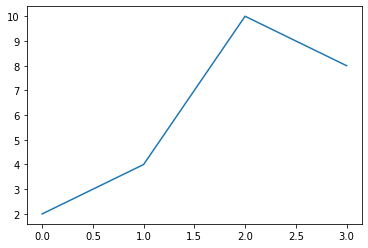

In [55]:
pd.Series([2, 4, 10, 8]).plot()

<AxesSubplot:>

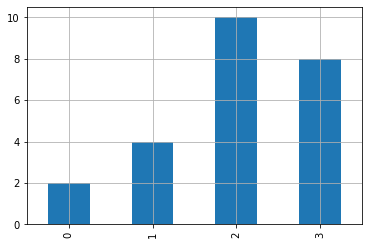

In [57]:
pd.Series([2, 4, 10, 8]).plot.bar(grid = True)

<AxesSubplot:>

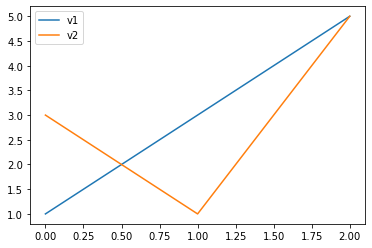

In [54]:
pd.DataFrame({"v1": [1, 3, 5],
              "v2": [3, 1, 5]}).plot()

<AxesSubplot:>

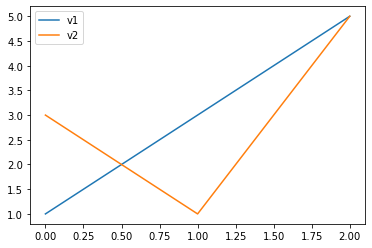

In [58]:
pd.DataFrame({"v1": [1, 3, 5],
              "v2": [3, 1, 5]}).plot.line()

<AxesSubplot:>

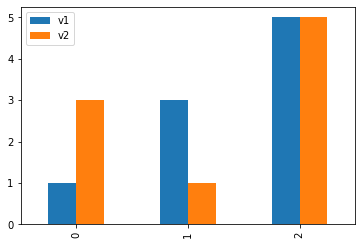

In [59]:
pd.DataFrame({"v1": [1, 3, 5],
              "v2": [3, 1, 5]}).plot.bar()

In [60]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([1, 2, 3, 4, 100])

In [63]:
ser1.mean()

3.0

In [64]:
ser1.median()

3.0

In [66]:
ser2.mean()

22.0

In [65]:
ser2.median()

3.0

<AxesSubplot:ylabel='Frequency'>

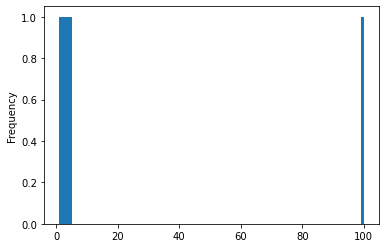

In [70]:
ser2.plot.hist(bins = 100)

In [71]:
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [72]:
df["price"].skew() # 왜도

1.618395283383529

In [73]:
df["price"].kurt() # 첨도

2.17769575924869

<AxesSubplot:>

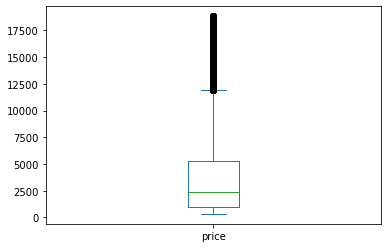

In [74]:
df["price"].plot.box()

In [75]:
df["price"].std() / df["price"].mean() * 100

101.44019579531273

In [76]:
df["carat"].std() / df["carat"].mean() * 100

59.40439057859833

In [77]:
df["price"].std() 

3989.4397381463023

In [78]:
df["carat"].std()

0.47401124440538067

In [79]:
from scipy.stats import pearsonr
df = pd.read_excel("iris_xlsx.xlsx")

In [80]:
pearsonr(df["Sepal.Length"], df["Sepal.Width"])

(-0.11756978413300209, 0.15189826071144766)

In [81]:
df.corr(method = "pearson")

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000